In [1]:
import pandas as pd
import zerorpc
from datetime import datetime

client = zerorpc.Client()
client.connect("tcp://127.0.0.1:1234")

print(client.hello())
hist_cdls = client.get_historical_candles(1, 0, 
                                          int(round(datetime.timestamp(datetime.fromisoformat('2022-05-01'))*1000)),
                                          int(round(datetime.timestamp(datetime.fromisoformat('2022-05-08'))*1000)))
print(hist_cdls)

Hello
[{'time': 1649178000000, 'open': 45915.0, 'high': 46186.0, 'low': 45886.0, 'close': 45961.0, 'volume': 936379.5332}, {'time': 1649181600000, 'open': 45957.0, 'high': 45990.0, 'low': 45862.0, 'close': 45894.0, 'volume': 2302355.3324}, {'time': 1649185200000, 'open': 45894.0, 'high': 46051.0, 'low': 45500.0, 'close': 46036.0, 'volume': 6902705.0189}, {'time': 1649188800000, 'open': 46040.0, 'high': 46118.0, 'low': 45646.0, 'close': 45880.0, 'volume': 1979629.101}, {'time': 1649192400000, 'open': 45879.0, 'high': 45993.0, 'low': 45758.0, 'close': 45957.0, 'volume': 924166.75}, {'time': 1649196000000, 'open': 45957.0, 'high': 46024.0, 'low': 45801.0, 'close': 45858.0, 'volume': 5379140.5179}, {'time': 1649199600000, 'open': 45858.0, 'high': 45886.0, 'low': 45322.0, 'close': 45504.0, 'volume': 4463173.1987}, {'time': 1649203200000, 'open': 45504.0, 'high': 45512.0, 'low': 44420.0, 'close': 45017.0, 'volume': 14984612.7472}, {'time': 1649206800000, 'open': 45017.0, 'high': 45363.0, 'lo

In [2]:
import mplfinance as mpf

In [3]:
data = pd.DataFrame(hist_cdls)
#print(data)
data['time'] = pd.to_datetime(data['time'], unit='ms')
#print(data)
cdl_df = data.set_index('time')
#pd.set_option('display.max_rows', cdl_df.shape[0]+1)
print(cdl_df)
#print(type(cdl_df['time']))
print(type(cdl_df.index))
print(type(cdl_df.open[0]))
data.info()

                        open     high      low    close        volume
time                                                                 
2022-04-05 17:00:00  45915.0  46186.0  45886.0  45961.0  9.363795e+05
2022-04-05 18:00:00  45957.0  45990.0  45862.0  45894.0  2.302355e+06
2022-04-05 19:00:00  45894.0  46051.0  45500.0  46036.0  6.902705e+06
2022-04-05 20:00:00  46040.0  46118.0  45646.0  45880.0  1.979629e+06
2022-04-05 21:00:00  45879.0  45993.0  45758.0  45957.0  9.241668e+05
...                      ...      ...      ...      ...           ...
2022-06-07 00:00:00  31340.0  31355.0  30119.0  30164.0  6.244463e+06
2022-06-07 01:00:00  30164.0  30223.0  29344.0  29549.0  7.210609e+06
2022-06-07 02:00:00  29549.0  29549.0  29181.0  29372.0  1.692542e+06
2022-06-07 03:00:00  29372.0  29639.0  29315.0  29537.0  1.831560e+06
2022-06-07 04:00:00  29537.0  29587.0  29434.0  29505.0  8.581547e+05

[1500 rows x 5 columns]
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'num

/opt/bitnami/jupyterhub-singleuser/.local/lib/python3.7/site-packages/mplfinance/_arg_validators.py:46: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


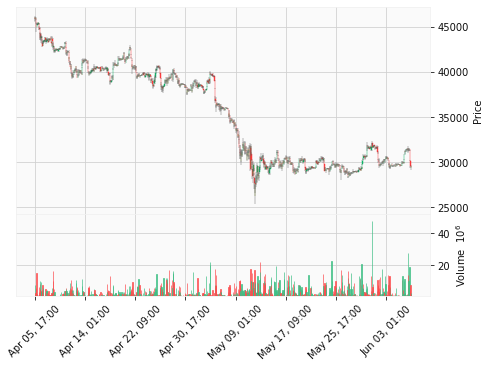

In [4]:
mpf.plot(cdl_df,type='candle',volume=True, style="yahoo")